# Thành viên nhóm:
## Nguyễn Hoàng Bảo       22110284
## Trần Thị Kim Chung     22110288
## Ngô Trung Hiếu         22110323

# Demo Tree K-Mean

## 1. Import thư viện

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re

## 2. Tải dữ liệu từ file CSV

In [2]:
df = pd.read_csv("../data/k-mean.csv")
df.head()

,Name,Coordinates
0,A,"(2,5)"
1,B,"(0,5)"
2,C,"(2,2)"
3,D,"(2,4)"
4,E,"(5,3)"


## 3. Các hàm cần thiết

### 3.1 Chuẩn hóa dữ liệu tọa độ từ dữ liệu Coordinates ban đầu

- Nhận đầu vào là chuỗi như: "(2,3)".
- Trích xuất số x và y bằng biểu thức chính quy.
- Trả về cặp tọa độ dạng (x, y) dưới dạng float.

In [3]:
def parse_coordinates(coord_str):
    # Extract x, y from string like "(x,y)"
    match = re.match(r'\(([\d.]+),([\d.]+)\)', coord_str)
    if match:
        return float(match.group(1)), float(match.group(2))
    raise ValueError(f"Invalid coordinate format: {coord_str}")

### 3.2 Tính khoảng cách Euclid giữa hai điểm trong không gian 2 chiều.

In [4]:
def euclidean_distance(point1, point2):
    return np.sqrt(np.sum((point1 - point2) ** 2))

### 3.3 Thực hiện thuật toán K-means:

- Bắt đầu với centroids ban đầu (initial_centroids).
- Gán điểm vào cụm gần nhất.
- Tính lại centroid mới là trung bình các điểm trong cụm.

In [5]:
def kmeans(points, initial_centroids):
    centroids = np.array(initial_centroids)
    while True:
        # Gán mỗi điểm vào cụm gần nhất
        clusters = []
        for point in points:
            distances = [euclidean_distance(point, centroid) for centroid in centroids]
            cluster_idx = np.argmin(distances)
            clusters.append(cluster_idx)
        
        clusters = np.array(clusters)
        new_centroids = np.zeros_like(centroids)
        
        # Cập nhật centroid
        for i in range(len(centroids)):
            cluster_points = points[clusters == i]
            if len(cluster_points) > 0:
                new_centroids[i] = np.mean(cluster_points, axis=0)
            else:
                new_centroids[i] = centroids[i]  # Giữ nguyên nếu cụm không có điểm nào
        
        # Kiểm tra hội tụ
        if np.all(centroids == new_centroids):
            break
        centroids = new_centroids
    
    return clusters, centroids

### 3.4 Vẽ biểu đồ các cụm

- Mỗi cụm bằng màu khác nhau.
- Ghi tên mỗi điểm (dùng names).
- Đánh dấu centroid bằng dấu 'x' màu đen.

In [ ]:
def plot_clusters(points, clusters, centroids, names):
    plt.figure(figsize=(10, 8))
    colors = ['r', 'g', 'b']
    
    # Plot points
    for i in range(len(points)):
        cluster_idx = clusters[i]
        plt.scatter(points[i, 0], points[i, 1], c=colors[cluster_idx], label=f'Cluster {cluster_idx+1}' if i == 0 else "")
        plt.text(points[i, 0], points[i, 1], names[i], fontsize=8)
    
    # Plot centroids
    for i, centroid in enumerate(centroids):
        plt.scatter(centroid[0], centroid[1], c='black', marker='x', s=200, linewidths=3, label=f'Centroid {i+1}')
    
    plt.title('K-means Clustering Result')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.legend()
    plt.grid(True)
    #plt.savefig('kmeans_result.png')

## 4. Thưc hiện chương trình

- Tạo mảng lưu tên điểm và tọa độ điểm

In [7]:
names = []
points = []

for _, row in df.iterrows():
    x, y = parse_coordinates(row['Coordinates'])
    points.append([x, y])
    names.append(row['Name'])

names = np.array(names)
points = np.array(points)

print(names)
print(points)

['A' 'B' 'C' 'D' 'E' 'F' 'G' 'H' 'I' 'J']
[[ 2.  5.]
 [ 0.  5.]
 [ 2.  2.]
 [ 2.  4.]
 [ 5.  3.]
 [ 1.  5.]
 [ 3. 11.]
 [ 3.  5.]
 [ 2. 12.]
 [ 2. 10.]]


- Tạo điểm centroids ban đầu

In [8]:
initial_centroids = [
        [2.0, 5.0],
        [0.0, 5.0]
    ]

- Thực hiện thuật toán K-Mean

In [9]:
clusters, centroids = kmeans(points, initial_centroids)

- Trình diển kết quả

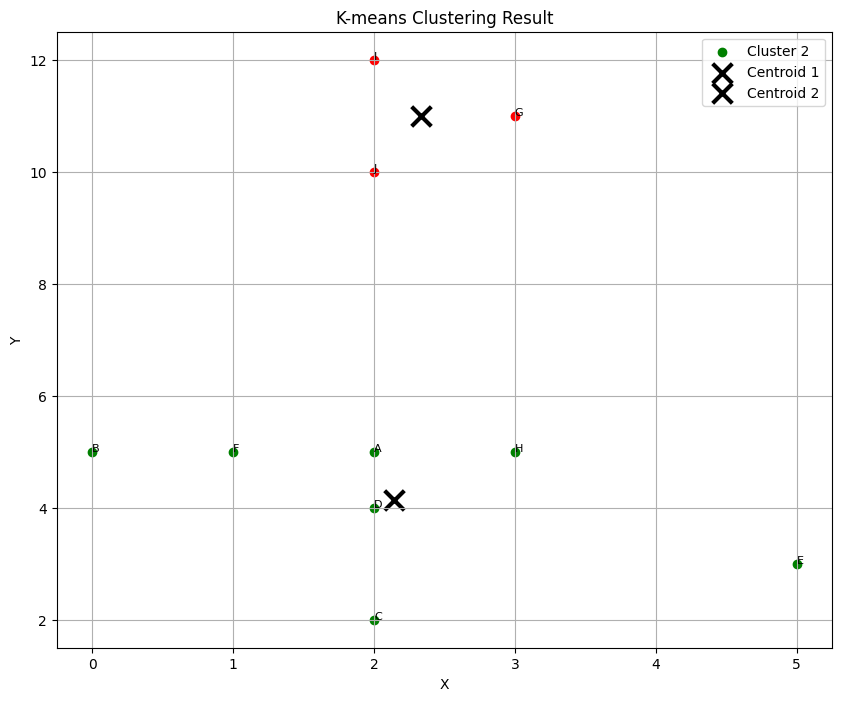

In [10]:
plot_clusters(points, clusters, centroids, names)